Firstly, import the necessary libraries and load in the data set:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from scipy.stats import norm
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
class_labels = data.target_names

Then, plot all the probability density functions based on the class-conditional probability of each feature of the dataset:

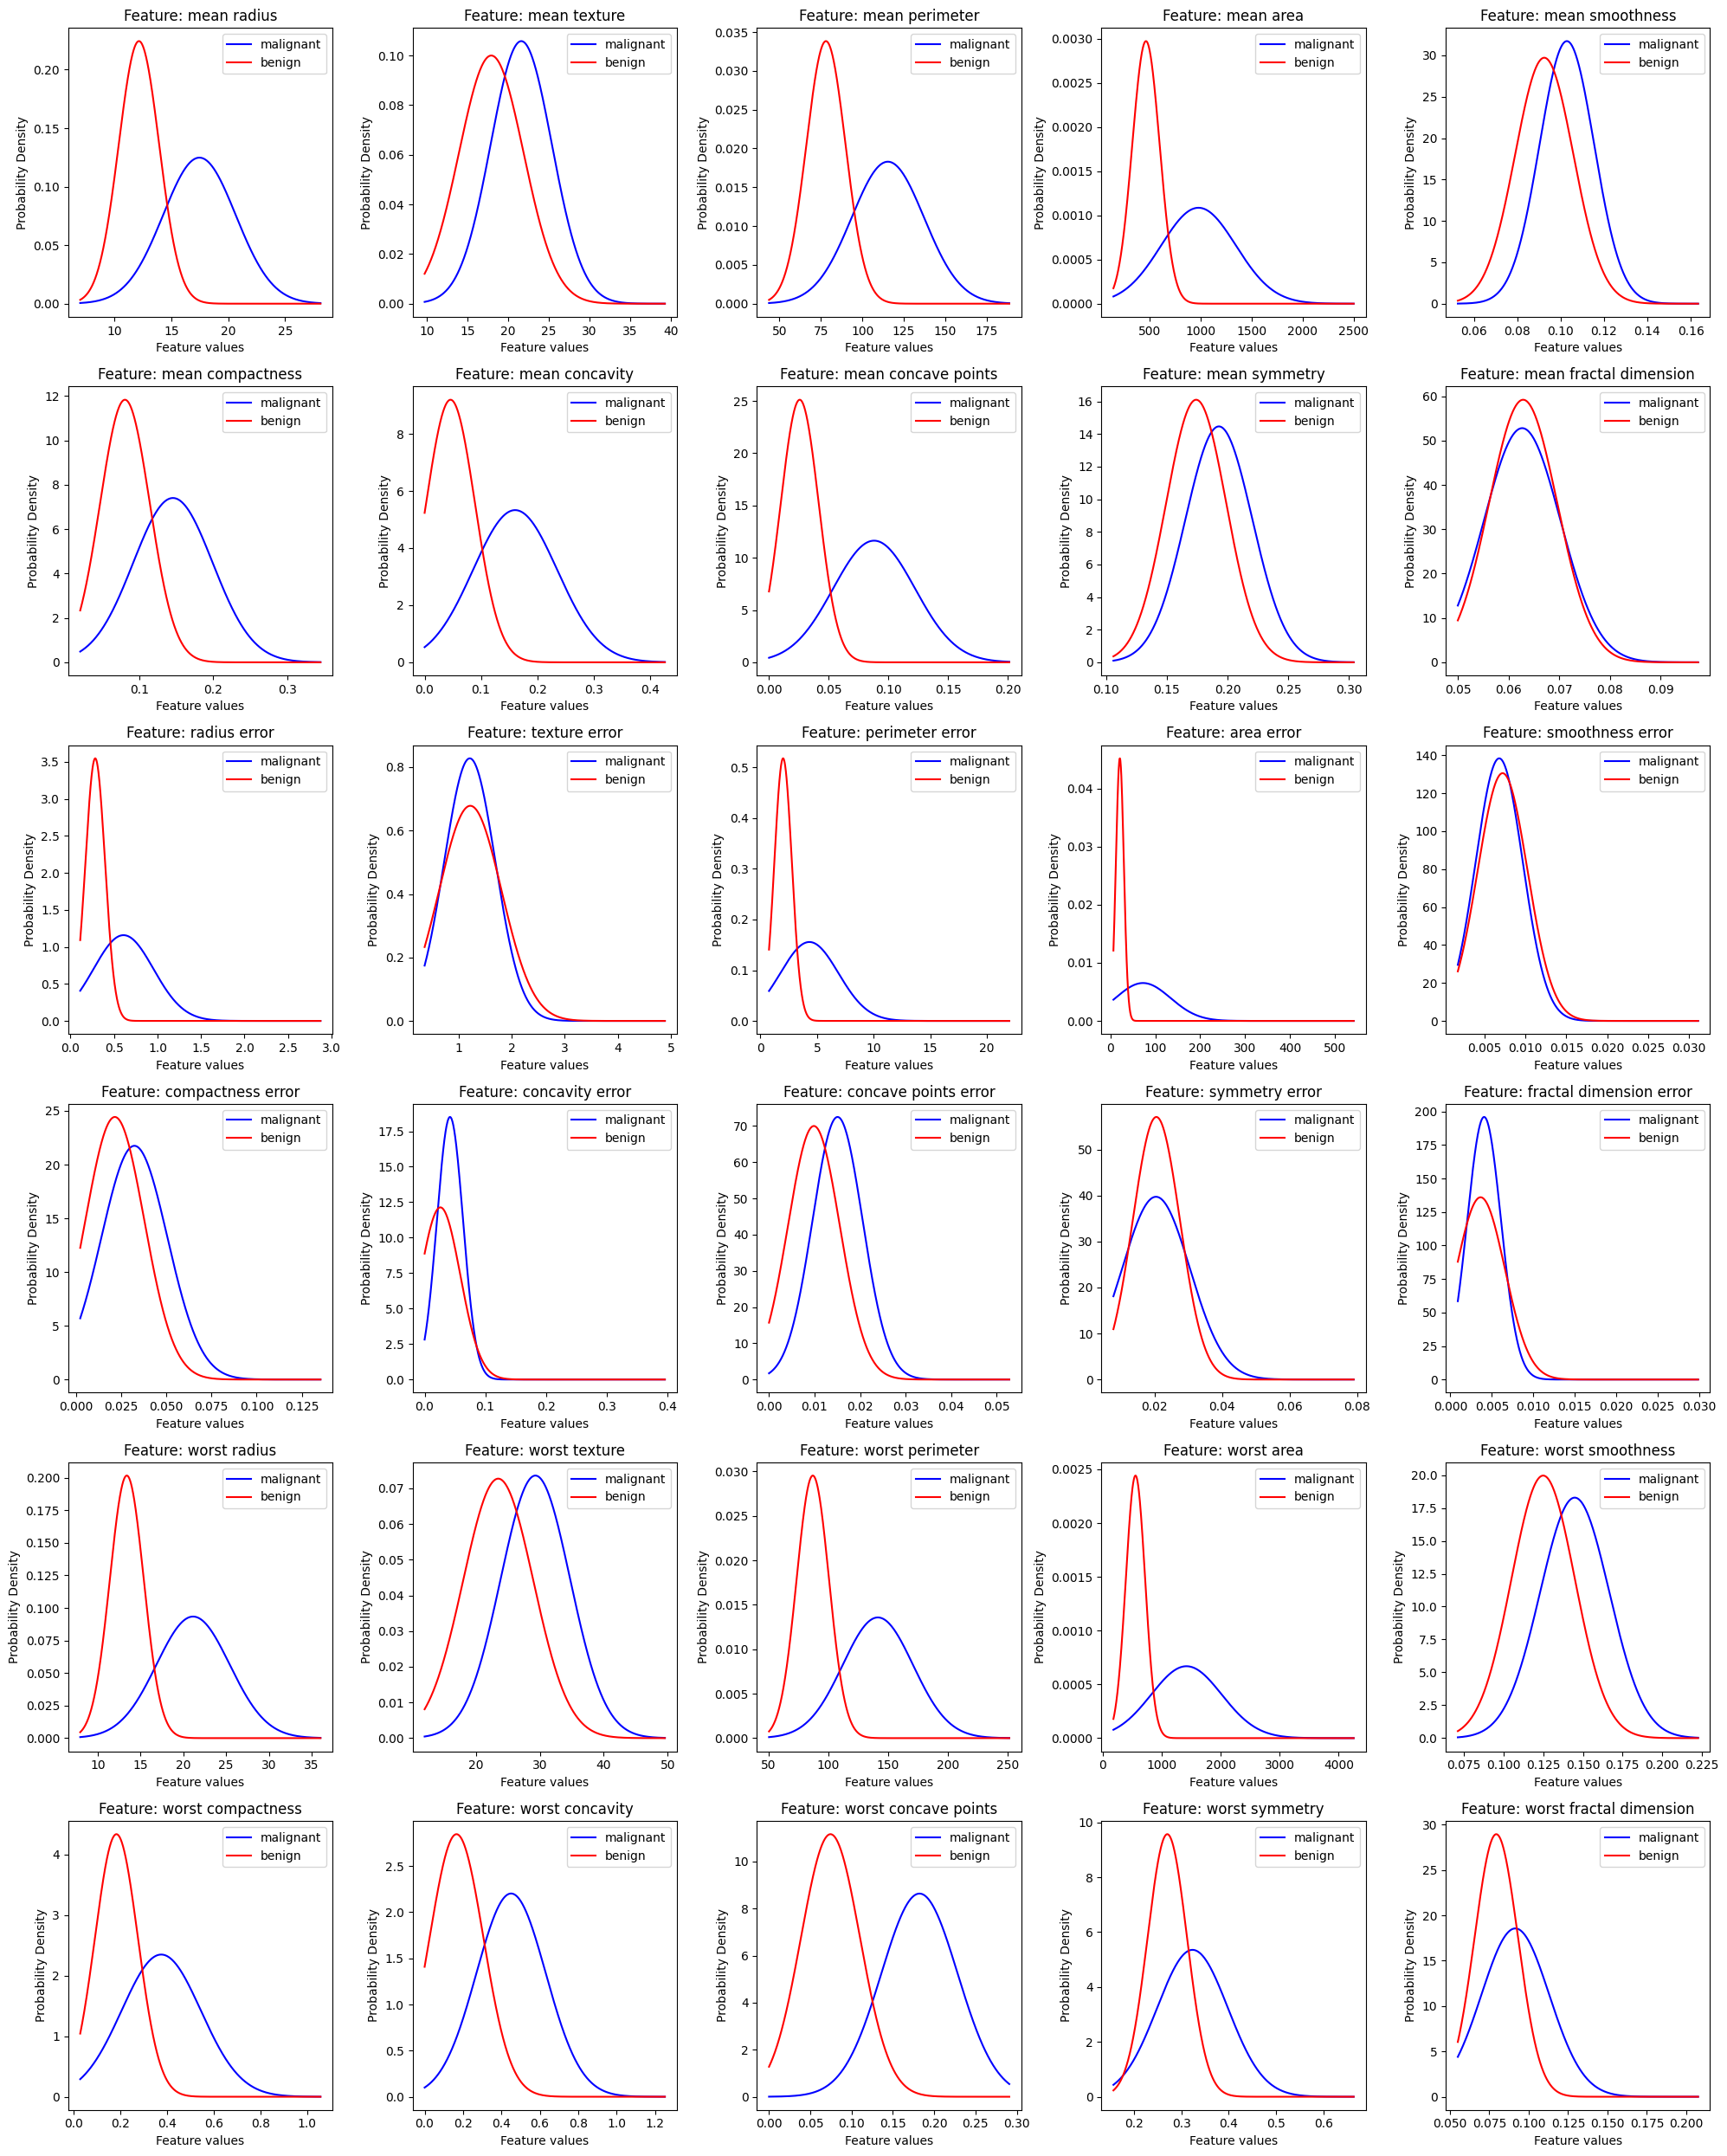

In [2]:

def plot_conditional_PDFs(X, y, feature_names, class_labels):
    # Initialize figure for plotting
    plt.figure(figsize=(20, 25))

    # Separate the data into two classes: benign (class 0) and malignant (class 1)
    X_0 = X[y == 0]
    X_1 = X[y == 1]
    
    for i, feature_name in enumerate(feature_names):
        feature_values_0 = X_0[:, i]
        feature_values_1 = X_1[:, i]
        
        # Calculate mean and std for both classes
        mean_0, std_0 = np.mean(feature_values_0), np.std(feature_values_0)
        mean_1, std_1 = np.mean(feature_values_1), np.std(feature_values_1)
        
        # Generate a range of values to compute the PDF over
        x_range = np.linspace(min(np.min(feature_values_0), np.min(feature_values_1)),
                              max(np.max(feature_values_0), np.max(feature_values_1)), 1000)
        
        # Compute the PDF for both classes
        pdf_0 = norm.pdf(x_range, mean_0, std_0)
        pdf_1 = norm.pdf(x_range, mean_1, std_1)
        
        # Plot PDFs for both classes
        plt.subplot(6, 5, i + 1)
        plt.plot(x_range, pdf_0, label=f'{class_labels[0]}', color='blue')
        plt.plot(x_range, pdf_1, label=f'{class_labels[1]}', color='red')
        plt.title(f'Feature: {feature_name}')
        plt.xlabel('Feature values')
        plt.ylabel('Probability Density')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the class-conditional probabilities
plot_conditional_PDFs(X, y, feature_names, class_labels)


Visually, a feature such as "worst concave points" seems to be a good predictor, because the peaks of the PDFs are quite distinct. However, looking at the x-axis we can see that the values for both PDFs are rather similar, so we could possibly do better. The feature "worst area", for example, has distinct peaks as well as a larger range of values to distinguish between the two classes. To check this we can test the predictive power of each feature and take a look at the top 5 features, based on correct percentage of predictions:

In [3]:
def compute_conditional_probability_predictions(X, y, feature_names):
    # Initialize an empty list to store results
    results = []

    # Separate the data into two classes: benign (class 0) and malignant (class 1)
    X_0 = X[y == 0]
    X_1 = X[y == 1]
    
    for i_feature, feature_name in enumerate(feature_names):
        # Get feature values for class 0 and class 1
        feature_values_0 = X_0[:, i_feature]
        feature_values_1 = X_1[:, i_feature]
        
        # Calculate mean and std for both classes
        mean_0, std_0 = np.mean(feature_values_0), np.std(feature_values_0)
        mean_1, std_1 = np.mean(feature_values_1), np.std(feature_values_1)
        
        # Keep track of feature predictions
        correct_predictions = 0
        false_predictions = 0

        # Predict class of each data point
        for i_data, data_point in enumerate(X):
            # Compute the probability density P(X = x | Y = class_0) and P(X = x | Y = class_1) using Gaussian PDF
            prob_density_0 = norm.pdf(data_point[i_feature], mean_0, std_0)
            prob_density_1 = norm.pdf(data_point[i_feature], mean_1, std_1)
            
            # Compare probability densities to predict class
            predicted_class = 0 if prob_density_0 > prob_density_1 else 1,
            true_class = y[i_data]
            
            # Update prediction tally
            if predicted_class == true_class:
                correct_predictions += 1
            else:
                false_predictions += 1
        
        # Append dictionary of feature name and correct prediction percentage to results
        results.append({"feature": feature_name,
                        "correct_prediction_%": correct_predictions/(correct_predictions + false_predictions),
                        })

    # Convert the list of dictionaries to a DataFrame
    class_conditional_probs = pd.DataFrame(results)
    
    return class_conditional_probs

# Compute class-conditional probabilities and visualize them
class_conditional_probs = compute_conditional_probability_predictions(X, y, feature_names)

In [4]:
# Print the 5 best predictive features
print(class_conditional_probs.nlargest(5, "correct_prediction_%"))

                 feature  correct_prediction_%
23            worst area              0.919156
7    mean concave points              0.915641
22       worst perimeter              0.915641
20          worst radius              0.913884
27  worst concave points              0.901582


This confirms the previous observation of "worst area" as a good feature for class-conditional probability predictions. However, "worst concave points" is very close in predicitve power.